## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [2]:
data = []
labels = []
classes = 7
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\nisha\\OneDrive\\Desktop\\stylumia\\proj'

## Preprocess the images

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((120,120))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [ ]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [ ]:
os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [4]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [5]:
print(data.shape, labels.shape)

(18391, 120, 120, 3) (18391,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14712, 120, 120, 3) (3679, 120, 120, 3) (14712,) (3679,)


## Convert labels to onehot encoding

In [8]:
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [9]:
print(X_train.shape[1:])

(120, 120, 3)


## Building the model -CNN Model

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))# we can use any activation functions
model.add(Dropout(rate=0.5))
model.add(Dense(7, activation='softmax')) # We have 43 classes that's why we have defined 43 in the dense

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
460/460 [==============================] - 403s 873ms/step - loss: 2.2472 - accuracy: 0.2980 - val_loss: 1.5858 - val_accuracy: 0.3444
Epoch 2/10
460/460 [==============================] - 410s 892ms/step - loss: 1.5199 - accuracy: 0.4000 - val_loss: 1.3285 - val_accuracy: 0.4814
Epoch 3/10
460/460 [==============================] - 438s 952ms/step - loss: 1.3646 - accuracy: 0.4644 - val_loss: 1.2625 - val_accuracy: 0.4974
Epoch 4/10
460/460 [==============================] - 437s 951ms/step - loss: 1.2619 - accuracy: 0.5052 - val_loss: 1.2285 - val_accuracy: 0.5143
Epoch 5/10
460/460 [==============================] - 399s 868ms/step - loss: 1.2068 - accuracy: 0.5224 - val_loss: 1.1586 - val_accuracy: 0.5455
Epoch 6/10
460/460 [==============================] - 413s 897ms/step - loss: 1.1567 - accuracy: 0.5487 - val_loss: 1.0984 - val_accuracy: 0.5613
Epoch 7/10
460/460 [==============================] - 408s 887ms/step - loss: 1.0965 - accuracy: 0.5678 - val_loss: 1.1199 -

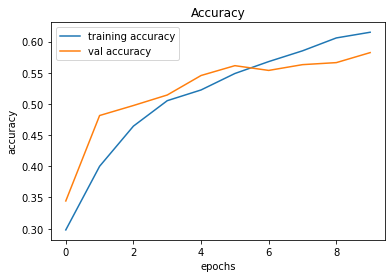

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

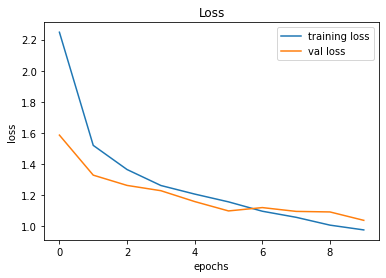

In [14]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:

path = os.path.join(cur_path,'test')
imgs = os.listdir(path)



## LEt's do testing on Test data

In [ ]:
data=[]
for img in imgs:
    image = Image.open(path + '\\'+ img)
    image = image.resize((120,120))
    data.append(np.array(image))
X_test=np.array(data)


In [ ]:
Y_pred=model.predict(X_test) 
classes=np.argmax(Y_pred,axis=1)
Y_pred

## Save the model

In [16]:
model.save("./training/TSR.h5")

## Load the Model

In [17]:
import os
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((120,120))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    classe=np.argmax(Y_pred,axis=1)
    return image,classe

In [19]:
!pip install xlsxwriter 

In [20]:
import xlsxwriter

In [21]:
workbook = xlsxwriter.Workbook('sample_submission1.xlsx')

In [22]:
worksheet = workbook.add_worksheet()

In [23]:
worksheet.write('A1', 'file_name')
worksheet.write('B1', 'label')

0

In [24]:
row=1

In [25]:
test_path=r'C:\Users\nisha\OneDrive\Desktop\stylumia\extracting-attributes-from-fashion-images-2\test'

In [26]:
for i in os.listdir(test_path):
    column=0
    img_pth=os.path.join(test_path,str(i))
    plot,prediction = test_on_img(img_pth)
    worksheet.write(row, column,str(i))
    column=1
    worksheet.write(row, column,prediction[0])
    row+=1

  

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


In [27]:
workbook.close()